In [3]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [4]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [5]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [6]:
collection_list = mongo_db.list_collection_names()

In [7]:
exp_name = "sep_hartmann6d"

In [57]:
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []
jobs_initial5_Mk200_Mj1_exp = []
jobs_initial5_Mk250_Mj1_exp = []
jobs_initial5_Mk300_Mj1_exp = []

jobs_saa_cumulative_multi_exp = []

recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []
recomm_initial5_Mk200_Mj1_exp = []
recomm_initial5_Mk250_Mj1_exp = []
recomm_initial5_Mk300_Mj1_exp = []

recomm_saa_cumulative_multi_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_cumulative_multi-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_multi-%d.jobs"%(exp_name,i)])
        
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_cumulative_multi-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_multi-%d.recommendations"%(exp_name,i)])

### Get objective method gets the predicted optimal value in GP model

In [58]:
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)
initial5_Mk250_Mj1_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_exp)
initial5_Mk300_Mj1_objs = functions.get_objective(recomm_initial5_Mk300_Mj1_exp)

saa_cumulative_multi = functions.get_objective(recomm_saa_cumulative_multi_exp)

In [59]:
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)
locs_initial5_Mk250_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_exp)
locs_initial5_Mk300_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk300_Mj1_exp)

locs_saa_cumulative_multi_exp = functions.get_recomm_loc(recomm_saa_cumulative_multi_exp)

In [60]:
recomm_saa_cumulative_multi_exp

[Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'sep_hartmann6d_cumulative_multi-0.recommendations'),
 Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'sep_hartmann6d_cumulative_multi-1.recommendations'),
 Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'sep_hartmann6d_cumulative_multi-2.recommendations'),
 Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'sep_hartmann6d_cumulative_multi-3.recommendations'),
 Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'sep_hartmann6d_cumulative_multi-4.recommendations'),
 Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False,

In [61]:
minimum = 35
for exp in locs_saa_cumulative_multi_exp:
    minimum = minimum if len(exp) > minimum else len(exp)
    
locs_saa_cumulative_multi_exp = [list_[:minimum] for list_ in locs_saa_cumulative_multi_exp]

In [62]:
locs_saa_cumulative_multi_exp

[[[0.9705493614108076,
   0.4763907288382677,
   0.6908232634223819,
   0.44972548242323884,
   0.8263159824075125,
   0.7843286944987727],
  [0.762876598024876,
   0.03914209831403137,
   0.13822530125354848,
   0.9020503203202298,
   0.6859958542602406,
   0.31608476280065545],
  [0.32938060584940154,
   0.6888262308092509,
   0.16305675838898726,
   0.7345602492615937,
   0.0430700231568224,
   0.6395887338380649],
  [0.08325170425335704,
   0.14985924880593693,
   0.4033706460674614,
   0.2137949297211239,
   0.9979694950078123,
   0.903440663138894],
  [0.5911561846913753,
   0.06636420369368182,
   0.03761432140459676,
   0.1718008502443153,
   0.5260069445505144,
   0.9372534328831409],
  [0.5931041797781238,
   0.06621308145438068,
   0.026589839918798527,
   0.1737637612953629,
   0.52447902816605,
   0.9395219731092965],
  [0.5939205794121936,
   0.06708788298986382,
   0.02343330420903116,
   0.17658557585159335,
   0.5325688115867615,
   0.9410814765921465],
  [0.5846260852

In [63]:
locs_saa_cumulative_multi_exp

[[[0.9705493614108076,
   0.4763907288382677,
   0.6908232634223819,
   0.44972548242323884,
   0.8263159824075125,
   0.7843286944987727],
  [0.762876598024876,
   0.03914209831403137,
   0.13822530125354848,
   0.9020503203202298,
   0.6859958542602406,
   0.31608476280065545],
  [0.32938060584940154,
   0.6888262308092509,
   0.16305675838898726,
   0.7345602492615937,
   0.0430700231568224,
   0.6395887338380649],
  [0.08325170425335704,
   0.14985924880593693,
   0.4033706460674614,
   0.2137949297211239,
   0.9979694950078123,
   0.903440663138894],
  [0.5911561846913753,
   0.06636420369368182,
   0.03761432140459676,
   0.1718008502443153,
   0.5260069445505144,
   0.9372534328831409],
  [0.5931041797781238,
   0.06621308145438068,
   0.026589839918798527,
   0.1737637612953629,
   0.52447902816605,
   0.9395219731092965],
  [0.5939205794121936,
   0.06708788298986382,
   0.02343330420903116,
   0.17658557585159335,
   0.5325688115867615,
   0.9410814765921465],
  [0.5846260852

### Getting immediate Regret IR measure

In [64]:
def hartmann(x1,x2,x3,x4,x5,x6):

	A = [[10,3,17,3.5,1.7,8],[0.05,10,17,0.1,8,14],[3,3.5,1.7,10,17,8],[17,8,0.05,10,0.1,14]]

	A = np.array(A)

	P = [[1312,1696,5569,124,8283,5886],[2329,4135,8307,3736,1004,9991],[2348,1451,3522,2883,3047,6650],[4047,8828,8732,5743,1091,381]]

	P = np.array(P)
	P = 1e-4*P

	alpha = [1.0,1.2,3.0,3.2]

	expVal = np.exp((-(A[:,0]*(x1-P[:,0])**2 + A[:,1]*(x2-P[:,1])**2 + A[:,2]*(x3-P[:,2])**2 + A[:,3]*(x4-P[:,3])**2 + A[:,4]*(x5-P[:,4])**2 + A[:,5]*(x6-P[:,5])**2)))
	y = -(alpha[0]*expVal[0] + alpha[1]*expVal[1] + alpha[2]*expVal[2] + alpha[3]*expVal[3])



	return y

In [65]:
func = hartmann

In [66]:
opt_val = -3.32237

In [67]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(func(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [68]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - func(*input_list)))

In [69]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [70]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [71]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



### Getting the "real" value of functions at suggested locations

In [72]:
sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)
sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)
sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)
sugg_obj_initial5_Mk250_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_exp)
sugg_obj_initial5_Mk300_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk300_Mj1_exp)

sugg_obj_saa_cumulative_multi_exp = get_sugg_obj_exp(locs_saa_cumulative_multi_exp)

#### averaging values of each experiments

In [73]:
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1 = np.average(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk300_Mj1 = np.average(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

avg_sugg_obj_saa_cumulative_multi = np.average(sugg_obj_saa_cumulative_multi_exp, axis=0)

### Getting IR values for looking optimization performances

In [74]:
irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk300_Mj1_exp)

In [75]:
irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_median = get_median_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_median = get_median_irs(irs_initial5_Mk300_Mj1_exp)

### Plotting the real function value at suggested locations

In [76]:
avg_sugg_obj_saa_cumulative_multi

array([-0.16424759, -0.20262658, -0.31495863, -0.21349516, -0.70043905,
       -0.86616728, -0.94163097, -1.08262502, -1.27979428, -1.40296909,
       -1.61235851, -1.71471046, -1.89369824, -2.03860931, -2.11324851,
       -2.19807546, -2.26650151, -2.3609937 ])

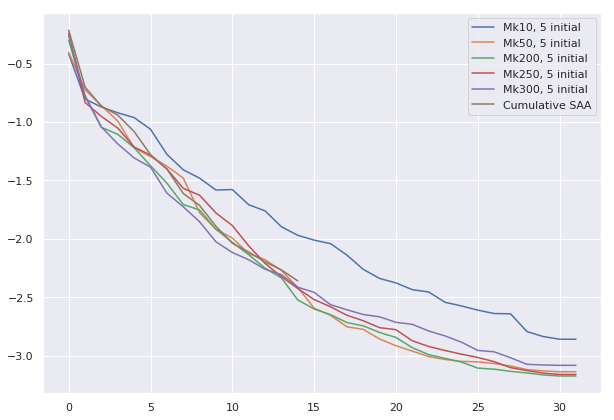

In [77]:
plt.figure(figsize=(10,7))

plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")

plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="Cumulative SAA")
plt.legend()
plt.show()